In [2]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from collections import defaultdict

import hts

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


TIMESERIES_SIZE = 90

## Сгенерируем искусственные иерархические временные ряды, которые представлены линейным трендом с шумом, и имеют следующую структуру

                                                            total 
                                                           /  |  \ 
                                                          |   |   | 
                                                          a   b   c

In [29]:
timeseries = np.arange(1, TIMESERIES_SIZE)

koeffs = [
    [2, 5],
    [-3, 1],
    [8, -30]
]

total = koeffs[0][0] * timeseries + koeffs[0][1] + np.random.normal(0, 8, size=len(timeseries)) 
a = koeffs[1][0] * timeseries + koeffs[1][1] + np.random.normal(0, 4, size=len(timeseries)) 
b = koeffs[2][0] * timeseries + koeffs[2][1] + np.random.normal(0, 11, size=len(timeseries)) 
c = total - a - b

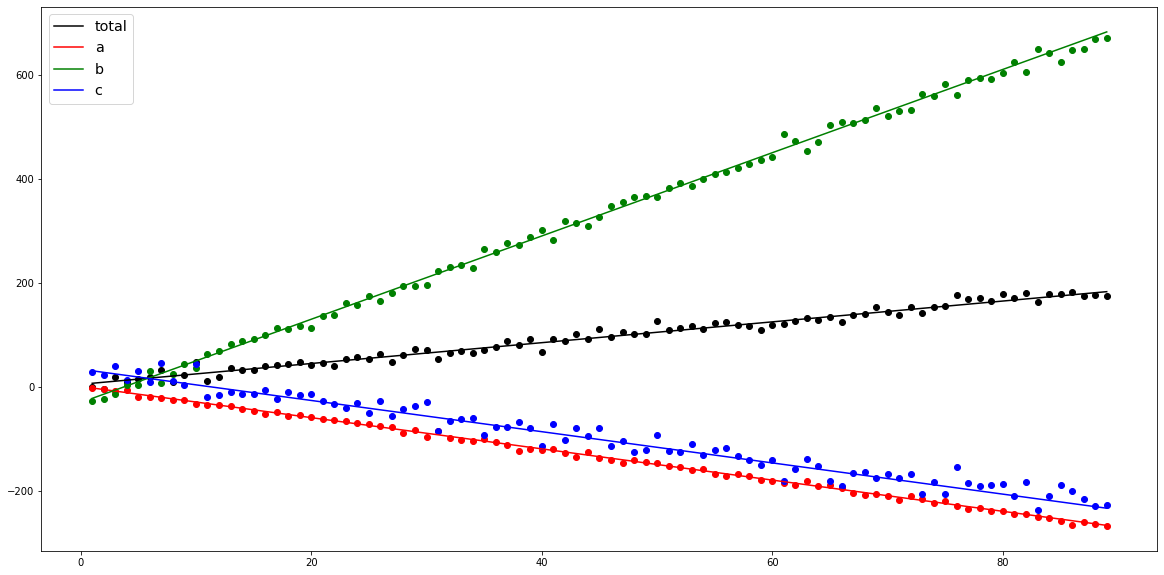

In [32]:
plt.subplots(figsize=(20, 10))

plt.scatter(x=timeseries, y=total, color='k')
plt.scatter(x=timeseries, y=a, color='r')
plt.scatter(x=timeseries, y=b, color='g')
plt.scatter(x=timeseries, y=c, color='b')

plt.plot(timeseries, koeffs[0][0] * timeseries + koeffs[0][1], 'k-', label='total')
plt.plot(timeseries, koeffs[1][0] * timeseries + koeffs[1][1], 'r-', label='a')
plt.plot(timeseries, koeffs[2][0] * timeseries + koeffs[2][1], 'g-', label='b')
plt.plot(timeseries, (koeffs[0][0] - koeffs[1][0] - koeffs[2][0]) * timeseries + 
         (koeffs[0][1] - koeffs[1][1] - koeffs[2][1]), 'b-', label='c')

plt.legend(fontsize='x-large')
plt.show()

In [5]:
hierarchy = {
    'total': ['a', 'b', 'c']
}

In [6]:
df = pd.DataFrame(np.array([total, a, b, c]).T, columns=['total', 'a', 'b', 'c'], 
             index=pd.date_range('2020-01-01', periods=len(timeseries), freq='D'))

In [7]:
df.head()

,total,a,b,c
2020-01-01,7.895363,-1.075837,-31.855289,40.826489
2020-01-02,3.637228,-4.186617,-11.821712,19.645557
2020-01-03,4.656530,-11.424089,-22.385402,38.466022
2020-01-04,11.052275,-13.484744,-2.398680,26.935698
2020-01-05,22.011534,-13.334696,28.245082,7.101149


In [8]:
tree = hts.hierarchy.HierarchyTree.from_nodes(hierarchy, df)
sum_mat, sum_mat_labels = hts.functions.to_sum_mat(tree)

In [9]:
sum_mat

array([[1., 1., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
sum_mat_labels

['total', 'a', 'b', 'c']

## Посмотрим, насколько хорошо справляются разные модели и методы библиотеки с нахождением тренда

# Prophet

# Yearly and daily seasonalily = False

---------- METHOD=OLS --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  25%|██▌       | 1/4 [00:01<00:03,  1.02s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  50%|█████     | 2/4 [00:01<00:01,  1.70it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  75%|███████▌  | 3/4 [00:01<00:00,  2.27it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality

---------- METHOD=WLSS --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  25%|██▌       | 1/4 [00:00<00:00,  3.28it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  50%|█████     | 2/4 [00:00<00:00,  3.59it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  75%|███████▌  | 3/4 [00:00<00:00,  3.61it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality

---------- METHOD=WLSV --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  25%|██▌       | 1/4 [00:00<00:00,  3.36it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  50%|█████     | 2/4 [00:00<00:00,  3.81it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  75%|███████▌  | 3/4 [00:00<00:00,  3.87it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality

---------- METHOD=FP --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  25%|██▌       | 1/4 [00:00<00:00,  3.36it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  50%|█████     | 2/4 [00:00<00:00,  3.85it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  75%|███████▌  | 3/4 [00:00<00:00,  3.95it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality

---------- METHOD=PHA --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  25%|██▌       | 1/4 [00:00<00:00,  3.53it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  50%|█████     | 2/4 [00:00<00:00,  3.91it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  75%|███████▌  | 3/4 [00:00<00:00,  3.81it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality

---------- METHOD=AHP --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  25%|██▌       | 1/4 [00:00<00:00,  3.59it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  50%|█████     | 2/4 [00:00<00:00,  3.95it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  75%|███████▌  | 3/4 [00:00<00:00,  3.87it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality

---------- METHOD=BU --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  25%|██▌       | 1/4 [00:00<00:00,  3.52it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  50%|█████     | 2/4 [00:00<00:00,  3.87it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  75%|███████▌  | 3/4 [00:00<00:00,  3.86it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality

---------- METHOD=NONE --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  25%|██▌       | 1/4 [00:00<00:00,  3.31it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  50%|█████     | 2/4 [00:00<00:00,  3.79it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting models:  75%|███████▌  | 3/4 [00:00<00:00,  3.93it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality

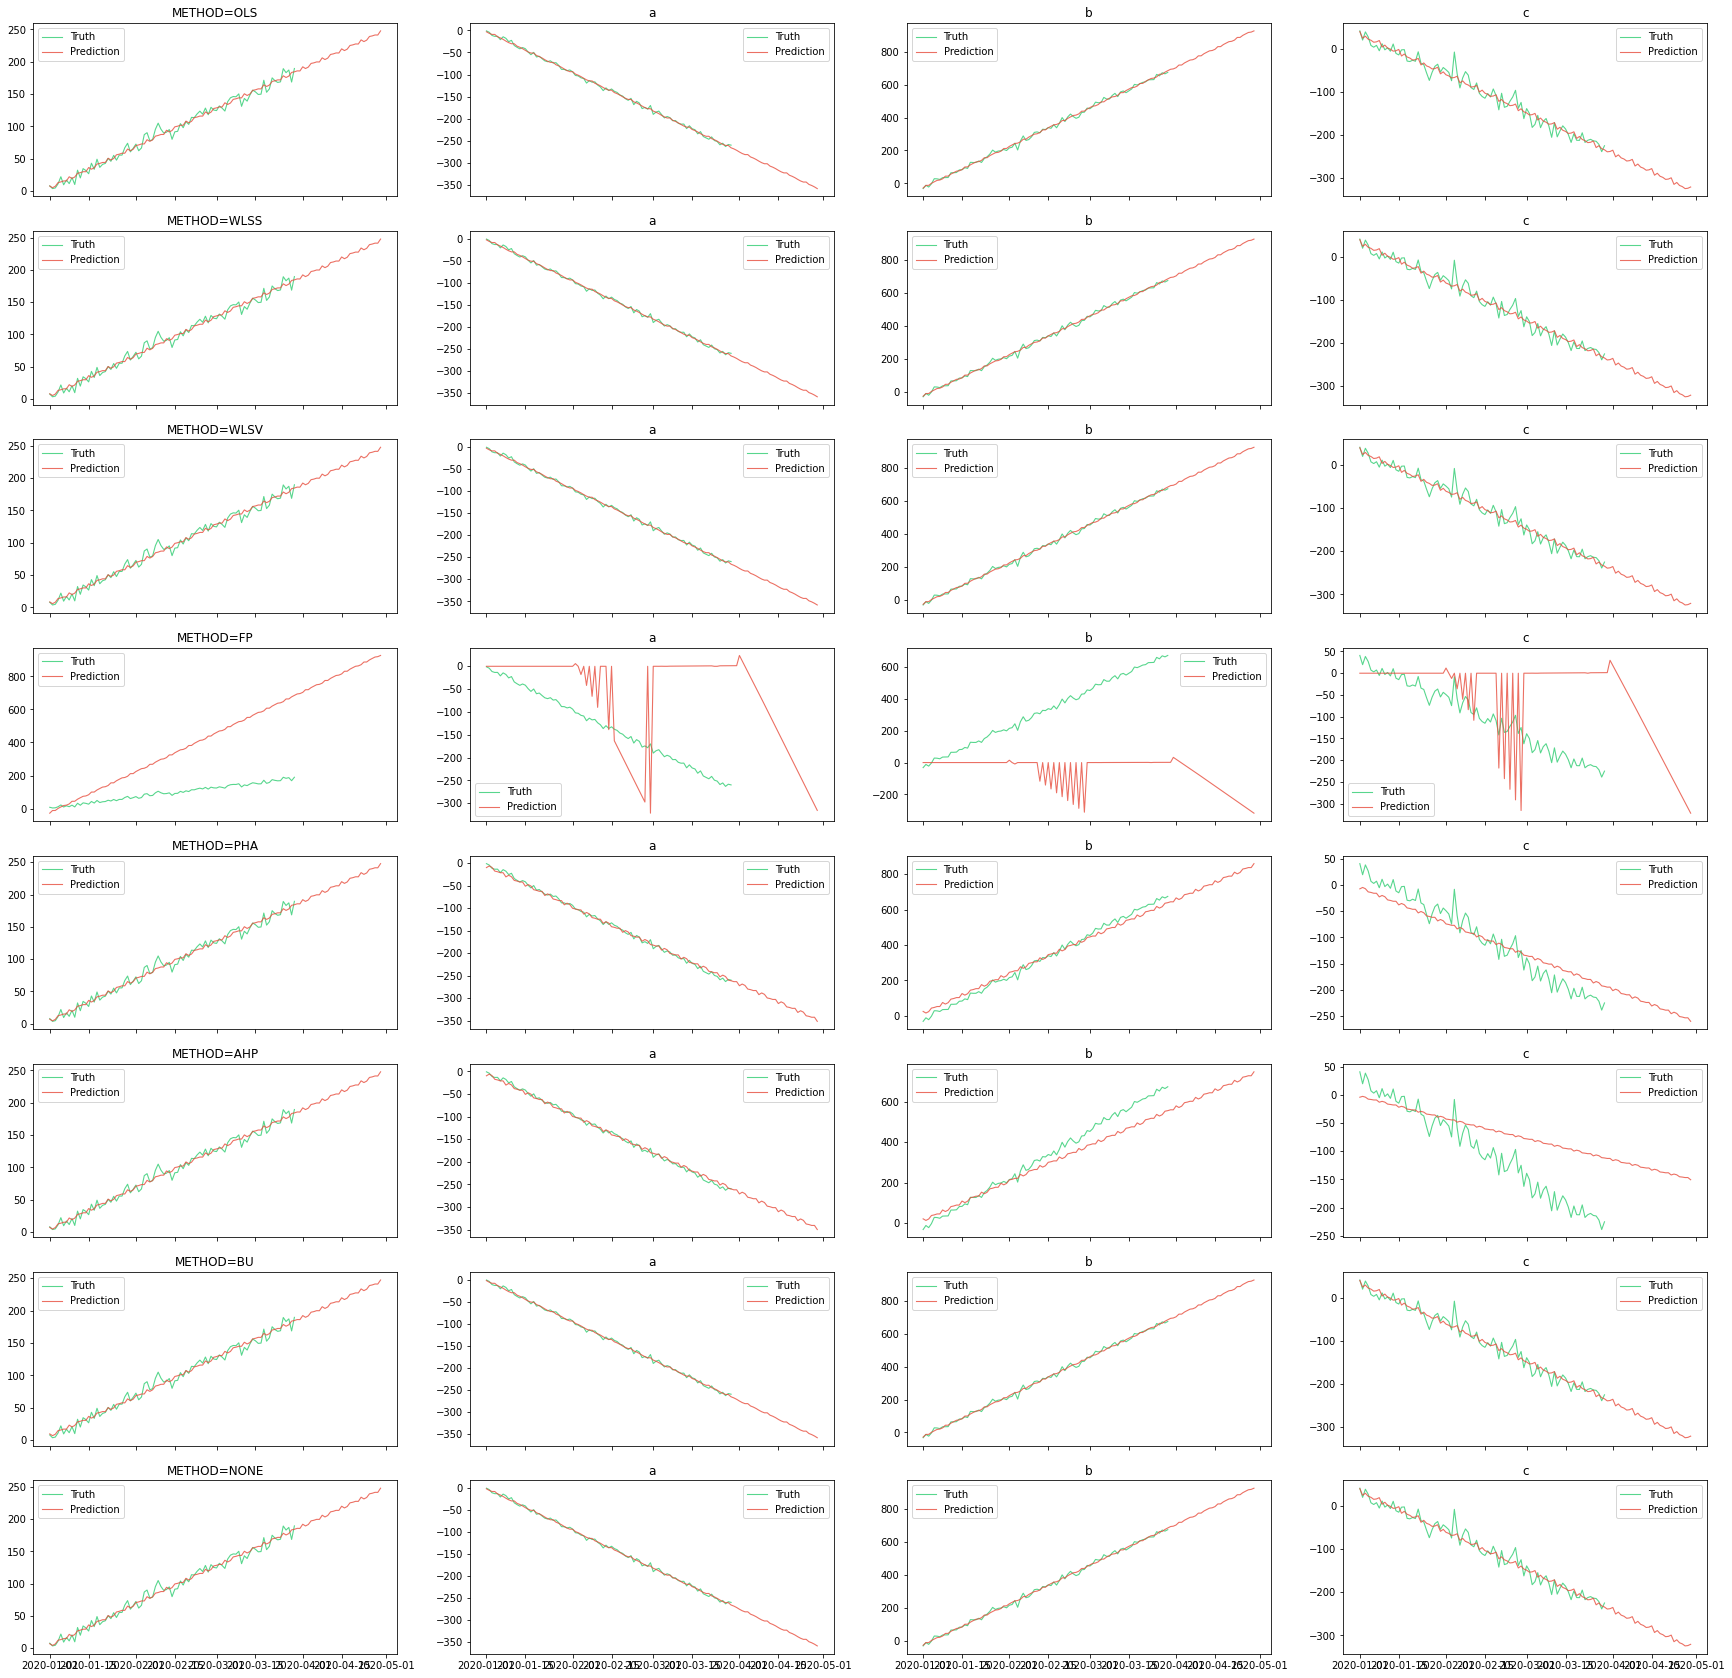

In [11]:
mthds = ["OLS", "WLSS", "WLSV", "FP", "PHA", "AHP", "BU", "NONE"]

preds = []
for k, method in enumerate(mthds):
    print(f'---------- METHOD={method} --------------')
    reg = hts.HTSRegressor(
        model='prophet', 
        revision_method=method, # "OLS", "WLSS", "WLSV", "FP", "PHA", "AHP", "BU", "NONE"
        #weekly_seasonality = True,
        #daily_seasonality = True,
        #yearly_seasonality = True,
        n_changepoints = 15,
        n_jobs=0
    )
    reg = reg.fit(df=df, nodes=hierarchy, show_warnings=False)
    preds.append(reg.predict(steps_ahead=31, show_warnings=False))


PLOT = ['total'] + [item for sublist in hierarchy.values() for item in sublist]
fig, axs = plt.subplots(len(mthds), len(PLOT), figsize=(30, 30), sharex=True)

for k, method in enumerate(mthds):
    for i, group in enumerate(PLOT):
        axs[k, i].plot(df[group], 
                lw=1.1, 
                color='#2ecc71', 
                alpha=0.8, 
                label='Truth')
        axs[k, i].plot(preds[k][group], 
                lw=1.1,
                color='#e74c3c', 
                alpha=0.8, 
                label='Prediction')
        axs[k, i].legend()
        if  i != 0:
            axs[k, i].set_title(f'{group}')
        else:
            axs[k, i].set_title(f'METHOD={method}')

# Yearly and daily seasonalily = True

Fitting model------ METHOD=OLS --------------


Fitting models: 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fcadb8cc400>


Fitting model------ METHOD=WLSS --------------


Fitting models: 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca63abae20>


Fitting model------ METHOD=WLSV --------------


Fitting models: 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca63b9d460>


Fitting model------ METHOD=FP --------------


Fitting models: 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca63b8a6a0>


Fitting model------ METHOD=PHA --------------


Fitting models: 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca63cc5280>
/home/jovyan/.local/lib/python3.9/site-packages/hts/functions.py:175: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fcst = fcst[:, np.newaxis]
/home/jovyan/.local/lib/python3.9/site-packages/hts/hierarchy/__init__.py:360: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pandas.concat(
/home/jovyan/.local/lib/python3.9/site-packages/hts/functions.py:191: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  props = props[:, np.newaxis]


Fitting model------ METHOD=AHP --------------


Fitting models: 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fc9f63ab850>
/home/jovyan/.local/lib/python3.9/site-packages/hts/functions.py:175: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fcst = fcst[:, np.newaxis]
/home/jovyan/.local/lib/python3.9/site-packages/hts/hierarchy/__init__.py:360: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pandas.concat(


Fitting model------ METHOD=BU --------------


Fitting models: 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca63b48c10>


Fitting model------ METHOD=NONE --------------


Fitting models: 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca6382f250>


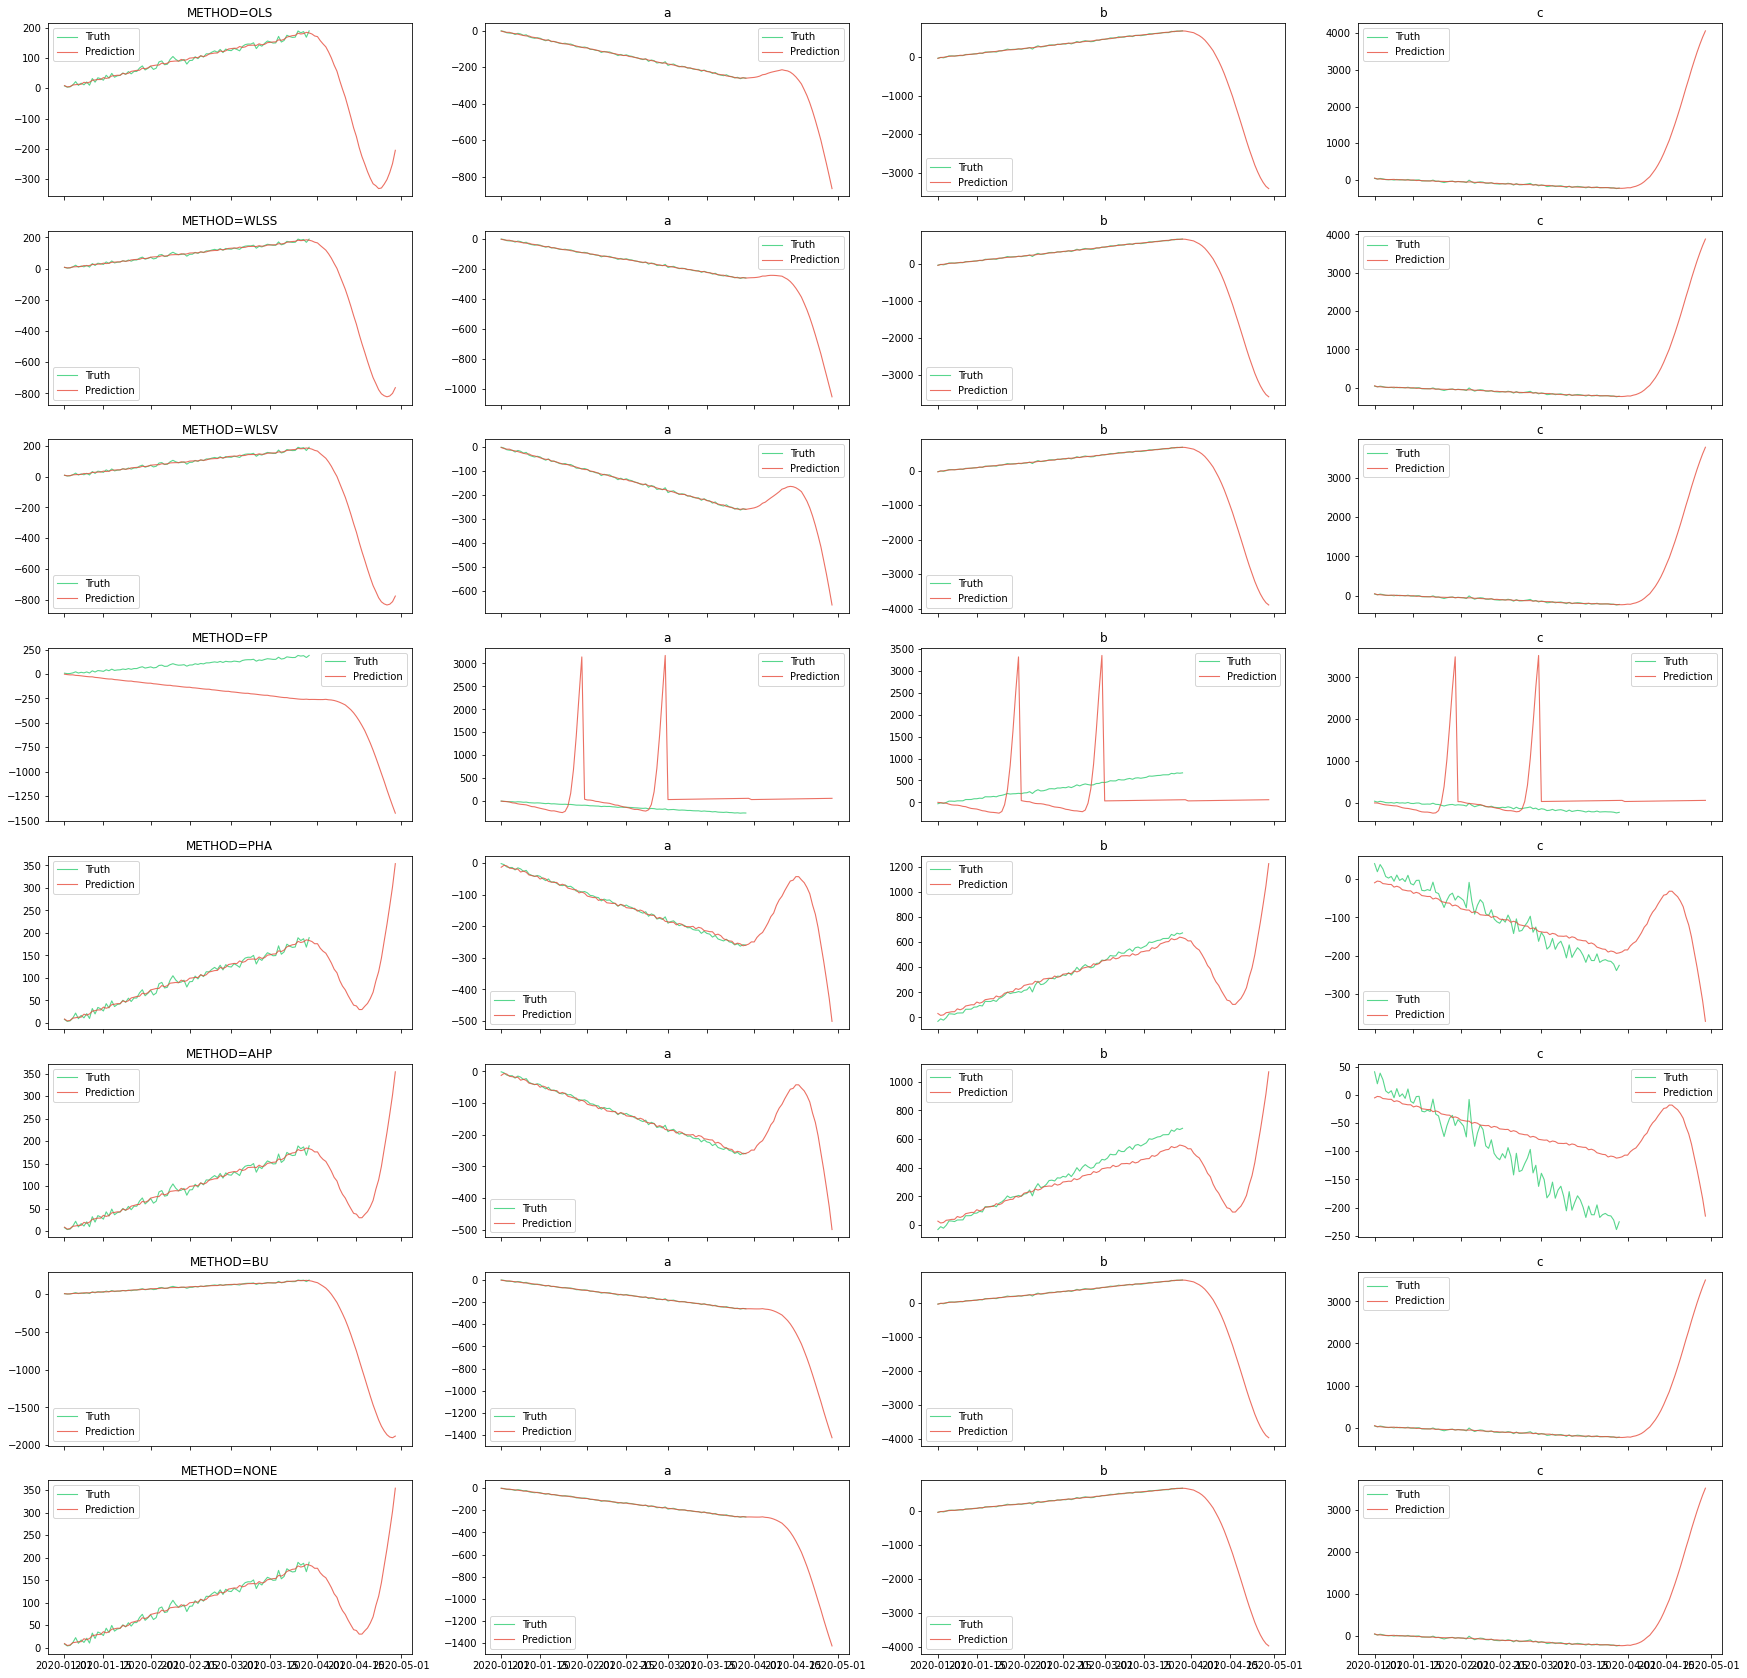

In [12]:
mthds = ["OLS", "WLSS", "WLSV", "FP", "PHA", "AHP", "BU", "NONE"]

preds = []
for k, method in enumerate(mthds):
    print(f'Fitting model------ METHOD={method} --------------')
    reg = hts.HTSRegressor(
        model='prophet', 
        revision_method=method, # "OLS", "WLSS", "WLSV", "FP", "PHA", "AHP", "BU", "NONE"
        #weekly_seasonality = True,
        daily_seasonality = True,
        yearly_seasonality = True,
        n_changepoints = 0,
        n_jobs=0
    )
    reg = reg.fit(df=df, nodes=hierarchy, show_warnings=False)
    preds.append(reg.predict(steps_ahead=31, show_warnings=False))


PLOT = ['total'] + [item for sublist in hierarchy.values() for item in sublist]
fig, axs = plt.subplots(len(mthds), len(PLOT), figsize=(30, 30), sharex=True)

for k, method in enumerate(mthds):
    for i, group in enumerate(PLOT):
        axs[k, i].plot(df[group], 
                lw=1.1, 
                color='#2ecc71', 
                alpha=0.8, 
                label='Truth')
        axs[k, i].plot(preds[k][group], 
                lw=1.1,
                color='#e74c3c', 
                alpha=0.8, 
                label='Prediction')
        axs[k, i].legend()
        if  i != 0:
            axs[k, i].set_title(f'{group}')
        else:
            axs[k, i].set_title(f'METHOD={method}')

# Holt Winters

---------- METHOD=OLS --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/.local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
Fitting models: 100%|██████████| 4/4 [00:00<00:00, 388.48it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca632a1f40>


---------- METHOD=WLSS --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 383.95it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca636f0e50>


---------- METHOD=WLSV --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 372.79it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca63af9a00>


---------- METHOD=FP --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 369.03it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca637d04f0>


---------- METHOD=PHA --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 370.73it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca63a93a60>
/home/jovyan/.local/lib/python3.9/site-packages/hts/functions.py:175: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fcst = fcst[:, np.newaxis]
/home/jovyan/.local/lib/python3.9/site-packages/hts/hierarchy/__init__.py:360: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pandas.concat(
/home/jovyan/.local/lib/python3.9/site-packages/hts/functions.py:191: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  props = props[:, np.newaxis]


---------- METHOD=AHP --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 410.08it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fcad9d124f0>


---------- METHOD=BU --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 441.38it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca63ab0400>


---------- METHOD=NONE --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 393.50it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca62da6a00>


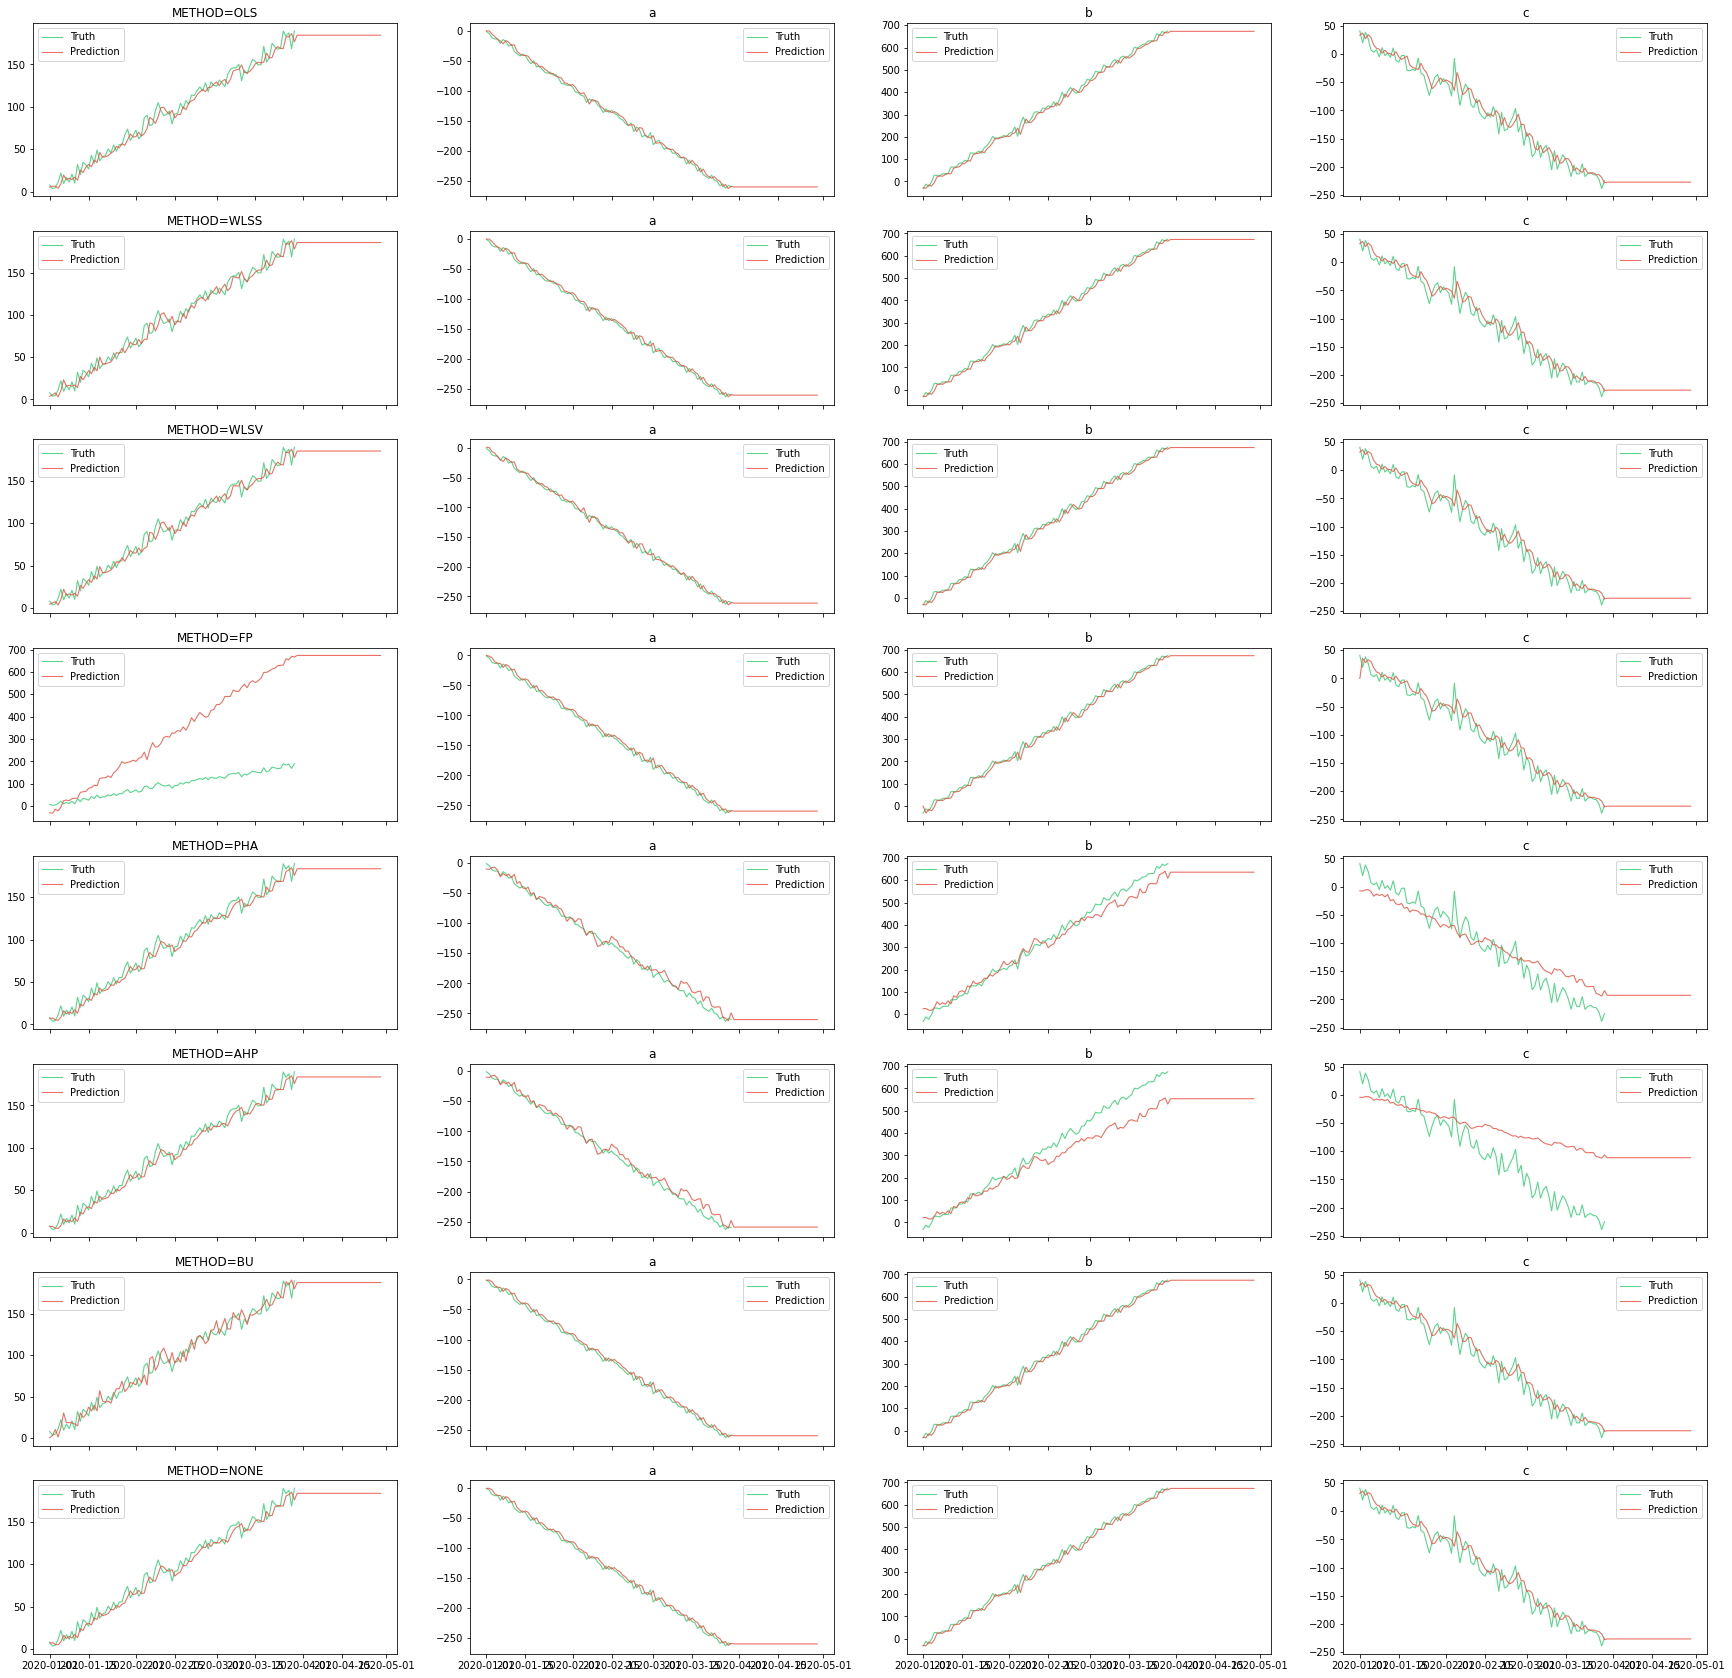

In [13]:
mthds = ["OLS", "WLSS", "WLSV", "FP", "PHA", "AHP", "BU", "NONE"]

preds = []
for k, method in enumerate(mthds):
    print(f'---------- METHOD={method} --------------')
    reg = hts.HTSRegressor(
        model='holt_winters', 
        revision_method=method, # "OLS", "WLSS", "WLSV", "FP", "PHA", "AHP", "BU", "NONE"
        #weekly_seasonality = True,
        #daily_seasonality = True,
        #yearly_seasonality = True,
        #n_changepoints = 15,
        n_jobs=0
    )
    reg = reg.fit(df=df, nodes=hierarchy, show_warnings=False)
    preds.append(reg.predict(steps_ahead=31, show_warnings=False))


PLOT = ['total'] + [item for sublist in hierarchy.values() for item in sublist]
fig, axs = plt.subplots(len(mthds), len(PLOT), figsize=(30, 30), sharex=True)

for k, method in enumerate(mthds):
    for i, group in enumerate(PLOT):
        axs[k, i].plot(df[group], 
                lw=1.1, 
                color='#2ecc71', 
                alpha=0.8, 
                label='Truth')
        axs[k, i].plot(preds[k][group], 
                lw=1.1,
                color='#e74c3c', 
                alpha=0.8, 
                label='Prediction')
        axs[k, i].legend()
        if  i != 0:
            axs[k, i].set_title(f'{group}')
        else:
            axs[k, i].set_title(f'METHOD={method}')

# Auto-arima

---------- METHOD=OLS --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg fo

---------- METHOD=WLSS --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg fo

---------- METHOD=WLSV --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg fo

---------- METHOD=FP --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg fo

---------- METHOD=PHA --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg fo

---------- METHOD=AHP --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg fo

---------- METHOD=BU --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg fo

---------- METHOD=NONE --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/home/jovyan/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg fo

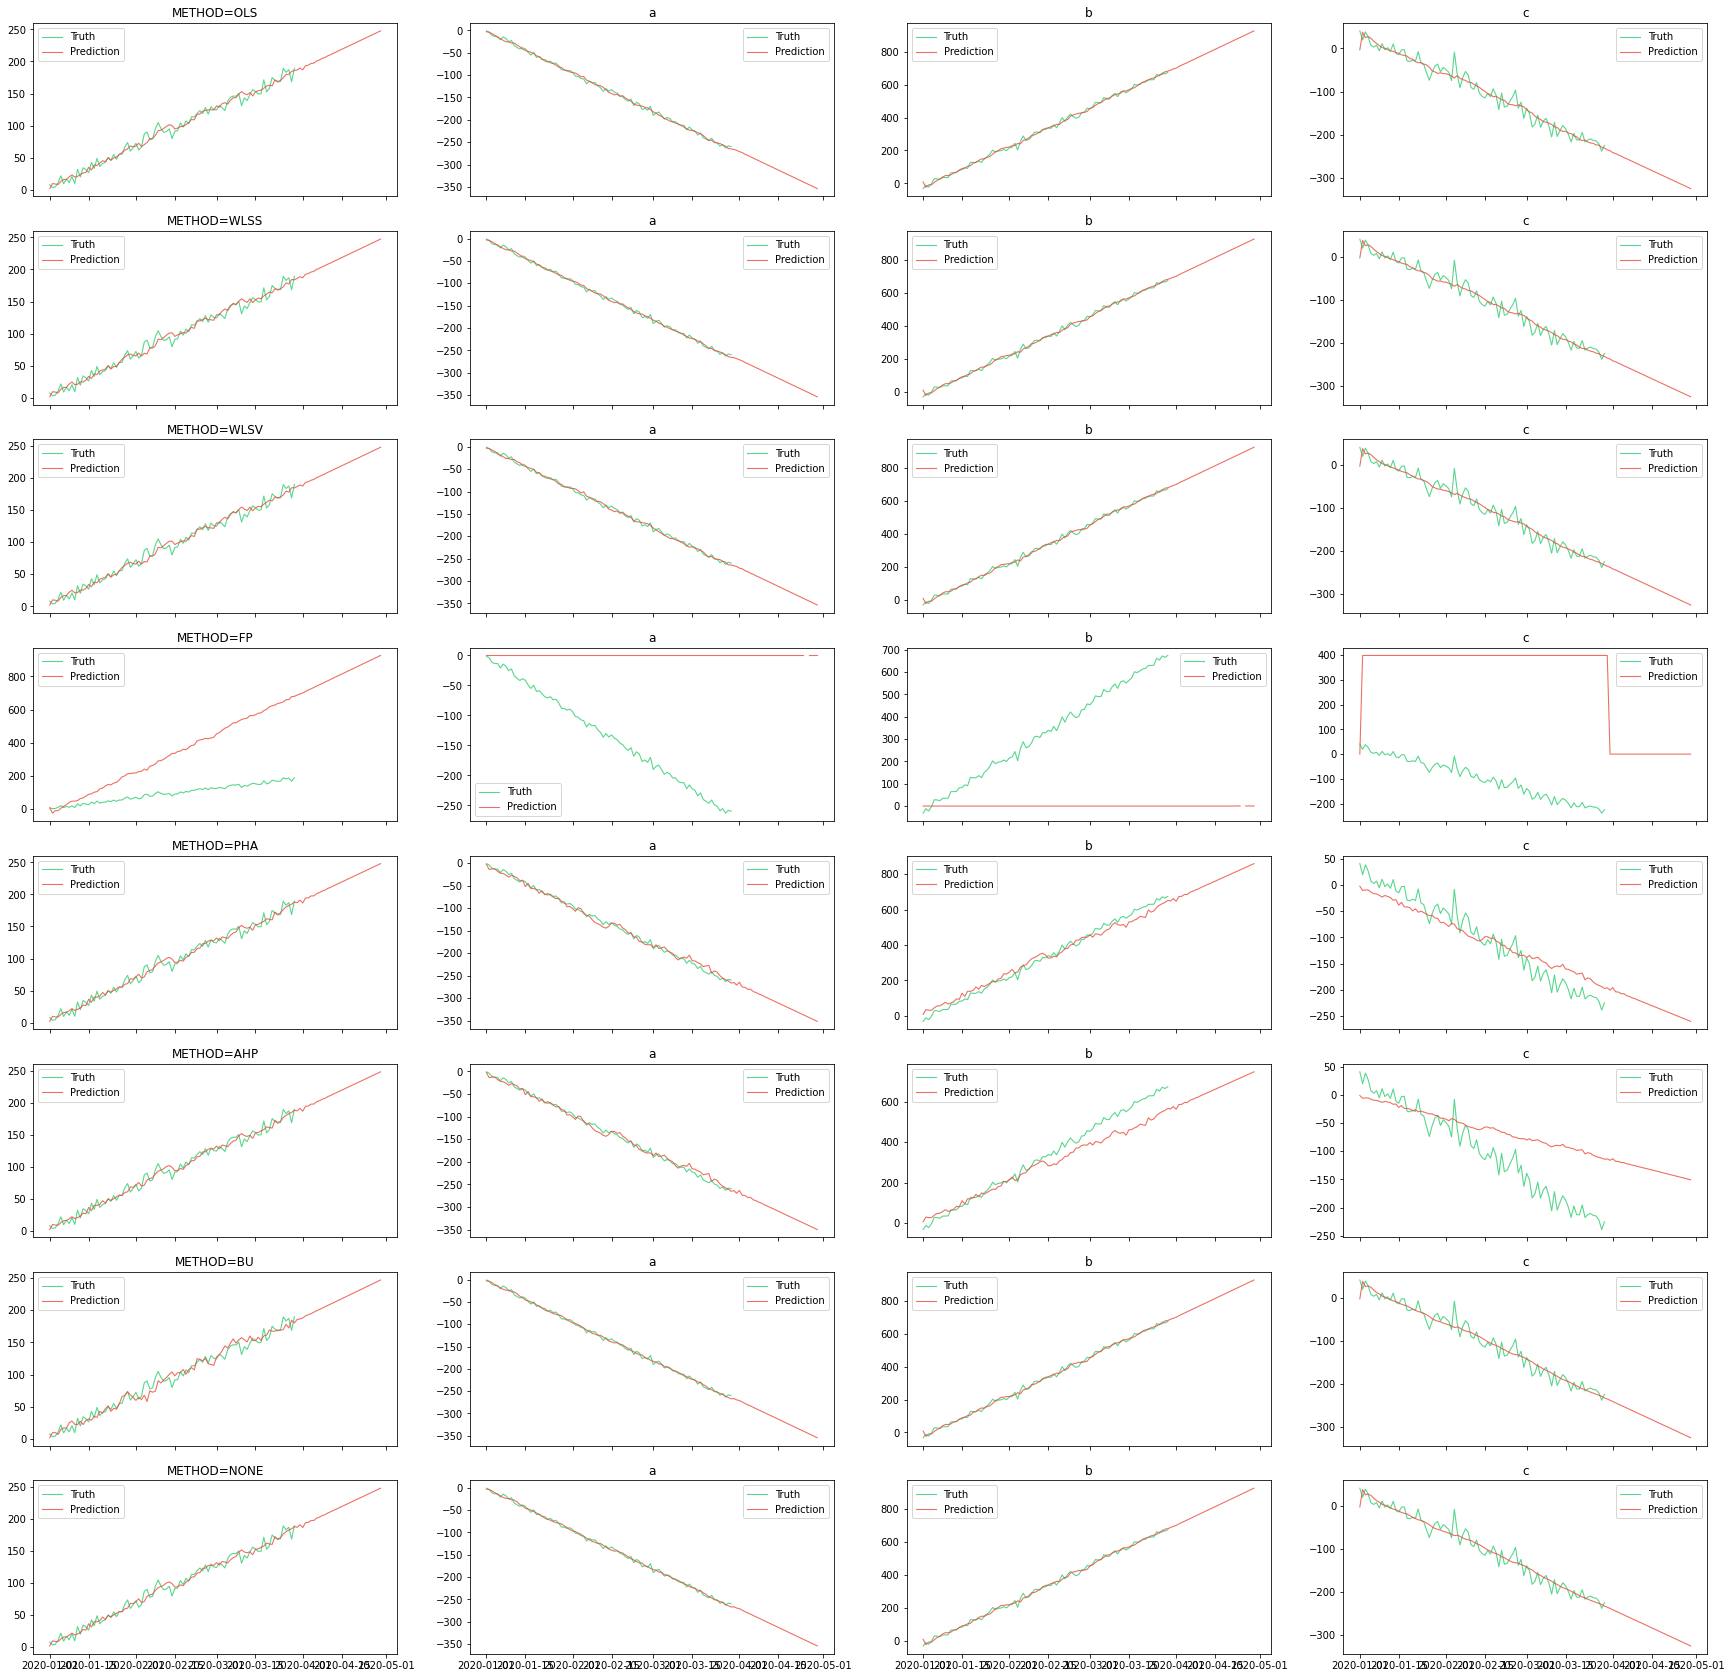

In [14]:
mthds = ["OLS", "WLSS", "WLSV", "FP", "PHA", "AHP", "BU", "NONE"]

preds = []
for k, method in enumerate(mthds):
    print(f'---------- METHOD={method} --------------')
    reg = hts.HTSRegressor(
        model='auto_arima', 
        revision_method=method, # "OLS", "WLSS", "WLSV", "FP", "PHA", "AHP", "BU", "NONE"
        #weekly_seasonality = True,
        #daily_seasonality = True,
        #yearly_seasonality = True,
        #n_changepoints = 15,
        n_jobs=0
    )
    reg = reg.fit(df=df, nodes=hierarchy, show_warnings=False)
    preds.append(reg.predict(steps_ahead=31, show_warnings=False))


PLOT = ['total'] + [item for sublist in hierarchy.values() for item in sublist]
fig, axs = plt.subplots(len(mthds), len(PLOT), figsize=(30, 30), sharex=True)

for k, method in enumerate(mthds):
    for i, group in enumerate(PLOT):
        axs[k, i].plot(df[group], 
                lw=1.1, 
                color='#2ecc71', 
                alpha=0.8, 
                label='Truth')
        axs[k, i].plot(preds[k][group], 
                lw=1.1,
                color='#e74c3c', 
                alpha=0.8, 
                label='Prediction')
        axs[k, i].legend()
        if  i != 0:
            axs[k, i].set_title(f'{group}')
        else:
            axs[k, i].set_title(f'METHOD={method}')

# Sarimax

---------- METHOD=OLS --------------


Fitting models:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/.local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
Fitting models: 100%|██████████| 4/4 [00:00<00:00, 355.49it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca47f06a00>


---------- METHOD=WLSS --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 308.29it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca5df0f520>


---------- METHOD=WLSV --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 355.13it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca5df15c40>


---------- METHOD=FP --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 322.02it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca5e2509a0>


---------- METHOD=PHA --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 342.83it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca63150b50>
/home/jovyan/.local/lib/python3.9/site-packages/hts/functions.py:175: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fcst = fcst[:, np.newaxis]
/home/jovyan/.local/lib/python3.9/site-packages/hts/hierarchy/__init__.py:360: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pandas.concat(
/home/jovyan/.local/lib/python3.9/site-packages/hts/functions.py:191: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  props = props[:, np.newaxis]


---------- METHOD=AHP --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 369.28it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca5df099a0>


---------- METHOD=BU --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 356.39it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca5df0f0d0>


---------- METHOD=NONE --------------


Fitting models: 100%|██████████| 4/4 [00:00<00:00, 325.83it/s]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca62ede430>


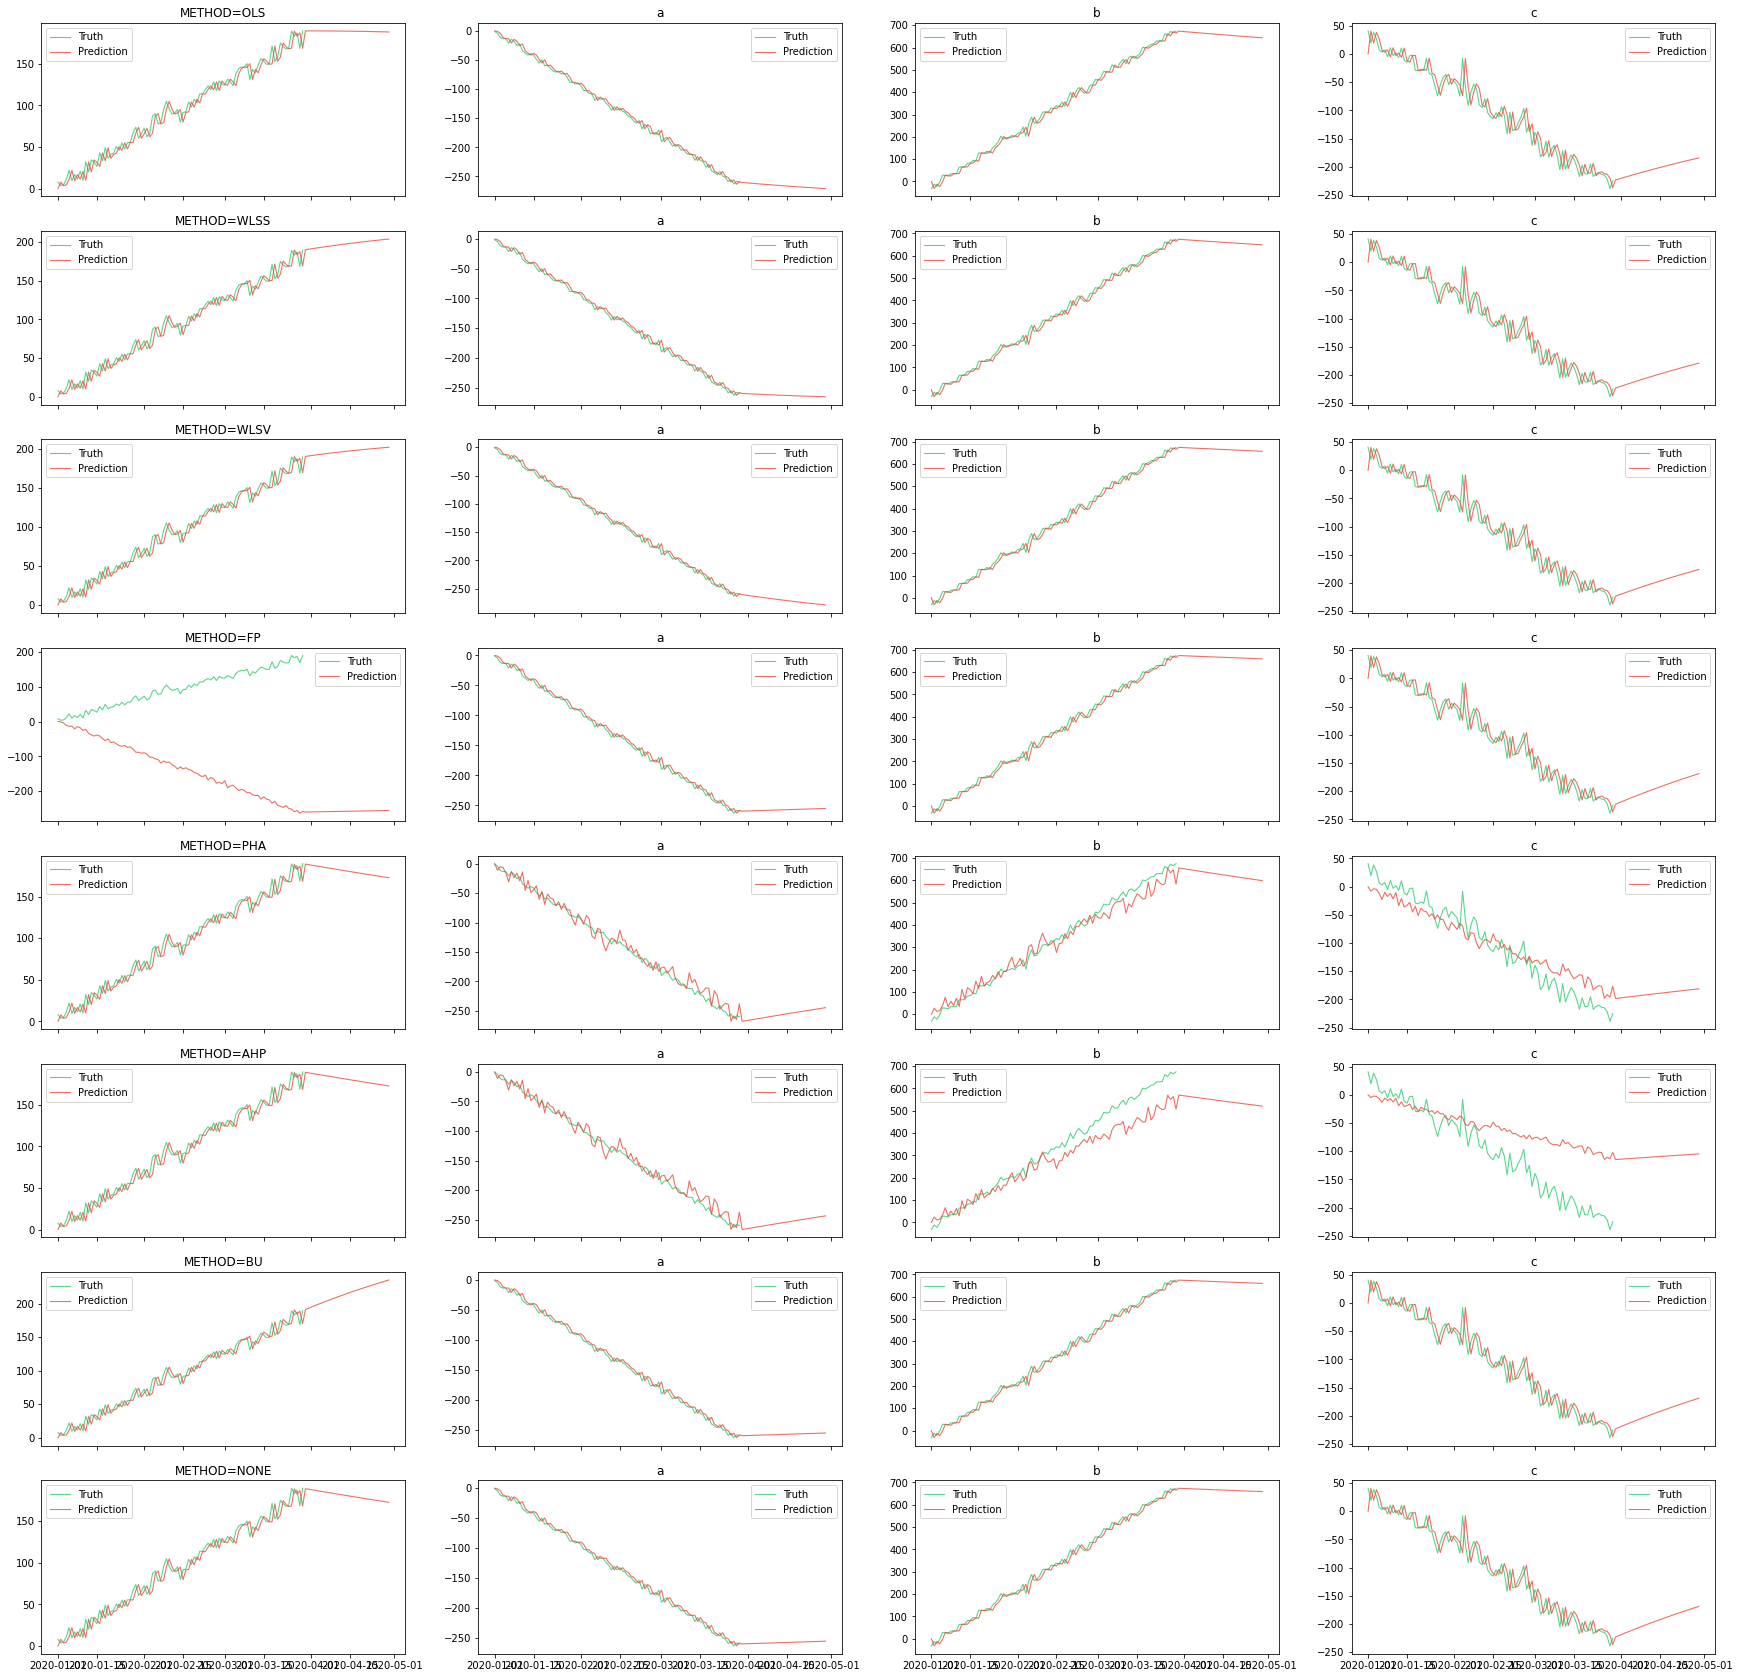

In [15]:
mthds = ["OLS", "WLSS", "WLSV", "FP", "PHA", "AHP", "BU", "NONE"]

preds = []
for k, method in enumerate(mthds):
    print(f'---------- METHOD={method} --------------')
    reg = hts.HTSRegressor(
        model='sarimax', 
        revision_method=method, # "OLS", "WLSS", "WLSV", "FP", "PHA", "AHP", "BU", "NONE"
        #weekly_seasonality = True,
        #daily_seasonality = True,
        #yearly_seasonality = True,
        #n_changepoints = 15,
        n_jobs=0
    )
    reg = reg.fit(df=df, nodes=hierarchy, show_warnings=False)
    preds.append(reg.predict(steps_ahead=31, show_warnings=False))


PLOT = ['total'] + [item for sublist in hierarchy.values() for item in sublist]
fig, axs = plt.subplots(len(mthds), len(PLOT), figsize=(30, 30), sharex=True)

for k, method in enumerate(mthds):
    for i, group in enumerate(PLOT):
        axs[k, i].plot(df[group], 
                lw=1.1, 
                color='#2ecc71', 
                alpha=0.8, 
                label='Truth')
        axs[k, i].plot(preds[k][group], 
                lw=1.1,
                color='#e74c3c', 
                alpha=0.8, 
                label='Prediction')
        axs[k, i].legend()
        if  i != 0:
            axs[k, i].set_title(f'{group}')
        else:
            axs[k, i].set_title(f'METHOD={method}')